In [ ]:
!pip install sklearn

In [48]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached toolz-0.12.0-py3-none-any.whl (55 kB)
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.2 MB 1.9 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.2 MB 2.1 MB/s eta 0:00:01
   ------- -------------------------------- 0.2/1.2 MB 2.0 MB/s eta 0:00:01
   ---------- ----------------------------- 0.3/1.2 MB 1.9 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.2 MB 2.2 MB/s eta 0:00:01
   ----------------- ---------------------- 0.5/1.2 MB 2.3 MB/s eta 0:00:01
   -------------------- ------------------- 0.6/1.2 MB 2.2 MB/s eta 0:00:01
   -------------


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
def pretty_print(data):
    print(json.dumps(data,indent=4))

In [11]:
api="G27XKZRV71HV3X7M"

In [17]:
def retrieve_data(function,symbol,api):
    url=f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey={api}"
    response = requests.get(url)
    data=response.json()
    return data
    # parsed=json.loads(data)
    # return parsed

In [18]:
overview="OVERVIEW"
incomeStatement="INCOME_STATEMENT"
symbol="INFY"
income=retrieve_data(incomeStatement,symbol,api)

In [30]:
if income is not None:
    income_statement=pd.DataFrame(income["quarterlyReports"])
    print("\nIncome Statement DataFrame\n")
    print(income_statement)


Income Statement DataFrame

   fiscalDateEnding reportedCurrency grossProfit totalRevenue costOfRevenue  \
0        2023-09-30              USD  1447000000   4718000000    3271000000   
1        2023-06-30              USD  1406000000   4617000000    3211000000   
2        2023-03-31              USD  1390000000   4554000000    3164000000   
3        2022-12-31              USD  1429000000   4659000000    3230000000   
4        2022-09-30              USD  1385000000   4555000000    3170000000   
5        2022-06-30              USD  1300000000   4444000000    3144000000   
6        2022-03-31              USD  1325000000   4280000000    2955000000   
7        2021-12-31              USD  1394000000   4250000000    2856000000   
8        2021-09-30              USD  1323000000   3998000000    2675000000   
9        2021-06-30              USD  1273000000   3782000000    2509000000   
10       2021-03-31              USD  1256000000   3613000000    2357000000   
11       2020-12-31    

In [21]:
income_statement.to_csv(f"../Data/CompanyInfo/{symbol}_quaterly_statements")

In [28]:
income_statement["fiscalDateEnding"]=pd.to_datetime(income_statement["fiscalDateEnding"])

In [39]:
income_statement1=income_statement.drop("reportedCurrency",axis=1)

In [57]:
# Select columns to be standardized
columns_to_standardize = ['totalRevenue']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the selected columns and transform the data
income_statement1[columns_to_standardize] = scaler.fit_transform(income_statement1[columns_to_standardize])

<BarContainer object of 21 artists>

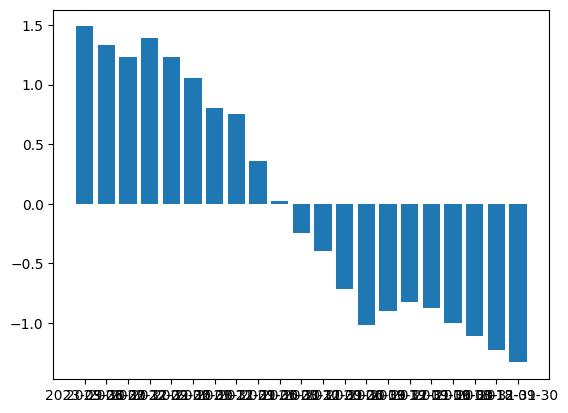

In [58]:
income_statement1[["netIncome","grossProfit"]].corr()
plt.bar(income_statement1["fiscalDateEnding"],income_statement1["totalRevenue"])

<BarContainer object of 21 artists>

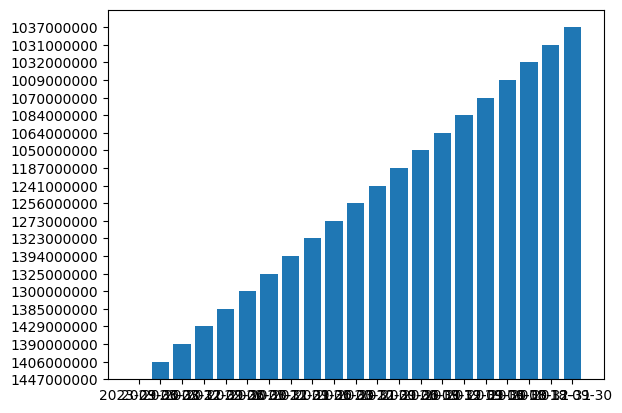

In [42]:
plt.bar(income_statement["fiscalDateEnding"],height=income_statement["grossProfit"])